In [1]:
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
%matplotlib notebook

In [3]:
D = 1
t0 = .1
t_array = linspace(t0,.8,101)
x_array = linspace(0,2,100)
x,t = meshgrid(x_array,t_array)
Z2tot = x**2*(t0/t)**1.0*exp(-x**2/(2*D*t))/(4*D**2*t**2)

<IPython.core.display.Javascript object>


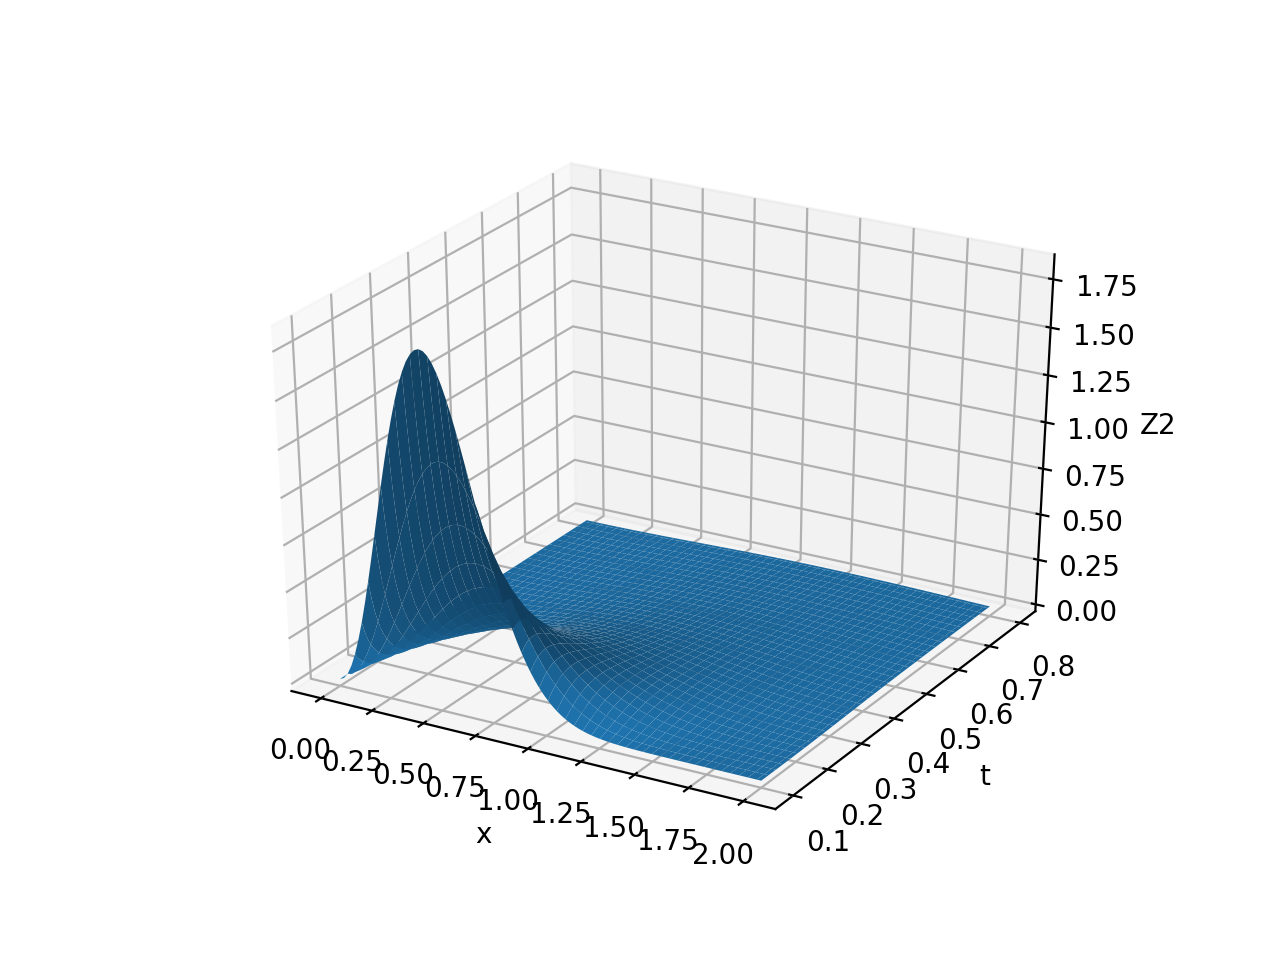

Text(0.5,0,'Z2')

In [12]:
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
ax.plot_surface(x,t, Z2tot) # Make the mesh plot
ax.set_xlabel('x') # Label axes
ax.set_ylabel('t')
ax.set_zlabel('Z2')

In [11]:
Z2totSize = size(Z2tot)
Z2tot_long = reshape(Z2tot, Z2totSize)
mybins = linspace(0,2,10)
counts, bins = histogram(Z2tot_long,mybins)
print(counts)
print(bins)
print('ratio = ', counts[0]/counts[-1])
counts = counts/sum(counts)

[9164  526  185   96   55   34   23   11    6]
[ 0.          0.22222222  0.44444444  0.66666667  0.88888889  1.11111111
  1.33333333  1.55555556  1.77777778  2.        ]
ratio =  1527.33333333


<IPython.core.display.Javascript object>


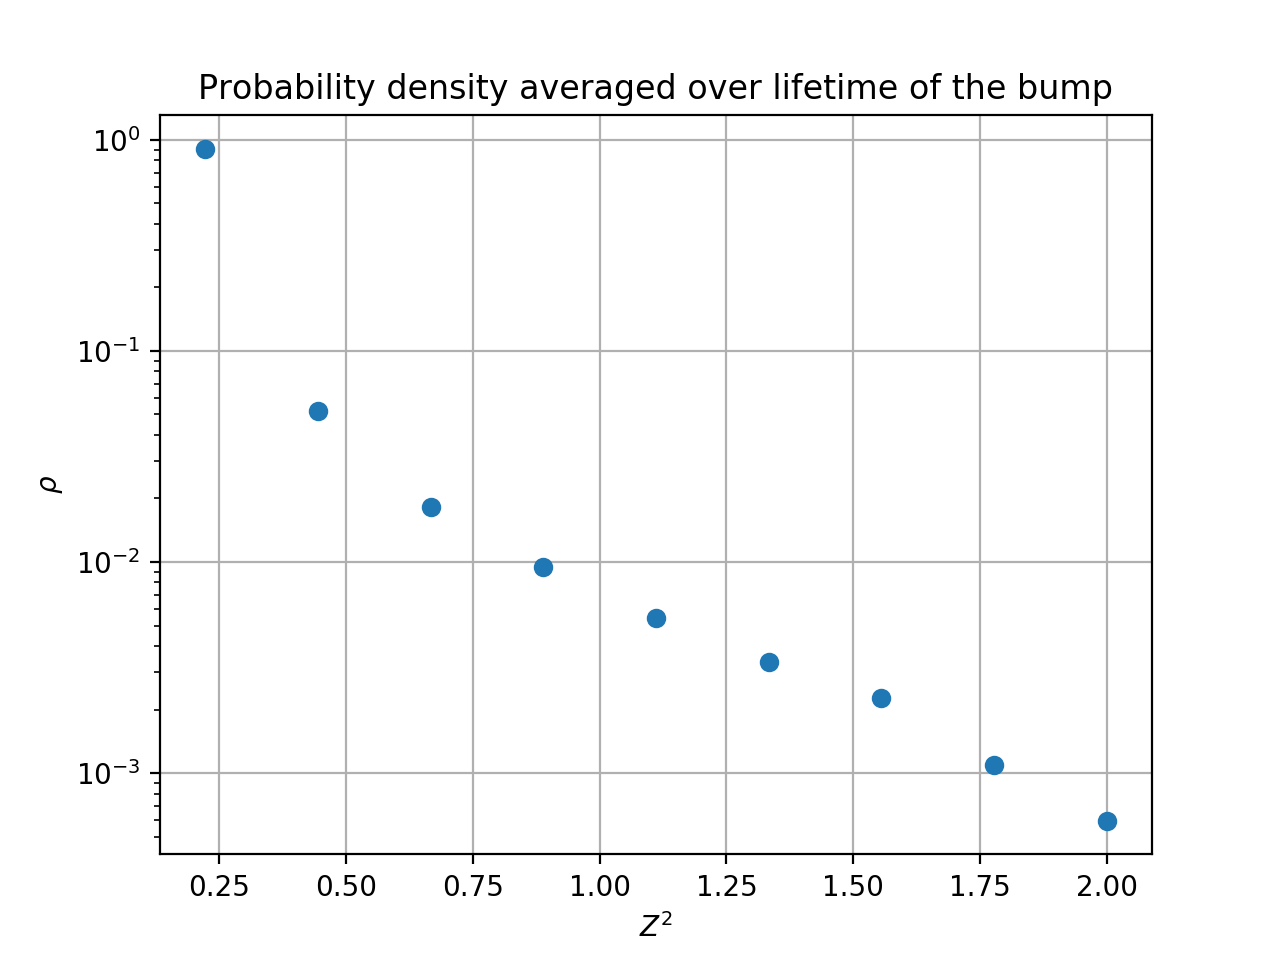

Text(0.5,1,'Probability density averaged over lifetime of the bump')

In [13]:
plt.figure()
plt.semilogy(bins[1:], counts, 'o', label='Numerical result')
plt.grid(True)
plt.xlabel('$Z^2$')
plt.ylabel(r'$\rho$')
plt.grid(True)
plt.title('Probability density averaged over lifetime of the bump')

In [7]:
Z2totslice = Z2tot[20,:]
plt.figure()
plt.plot(x_array,Z2totslice)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


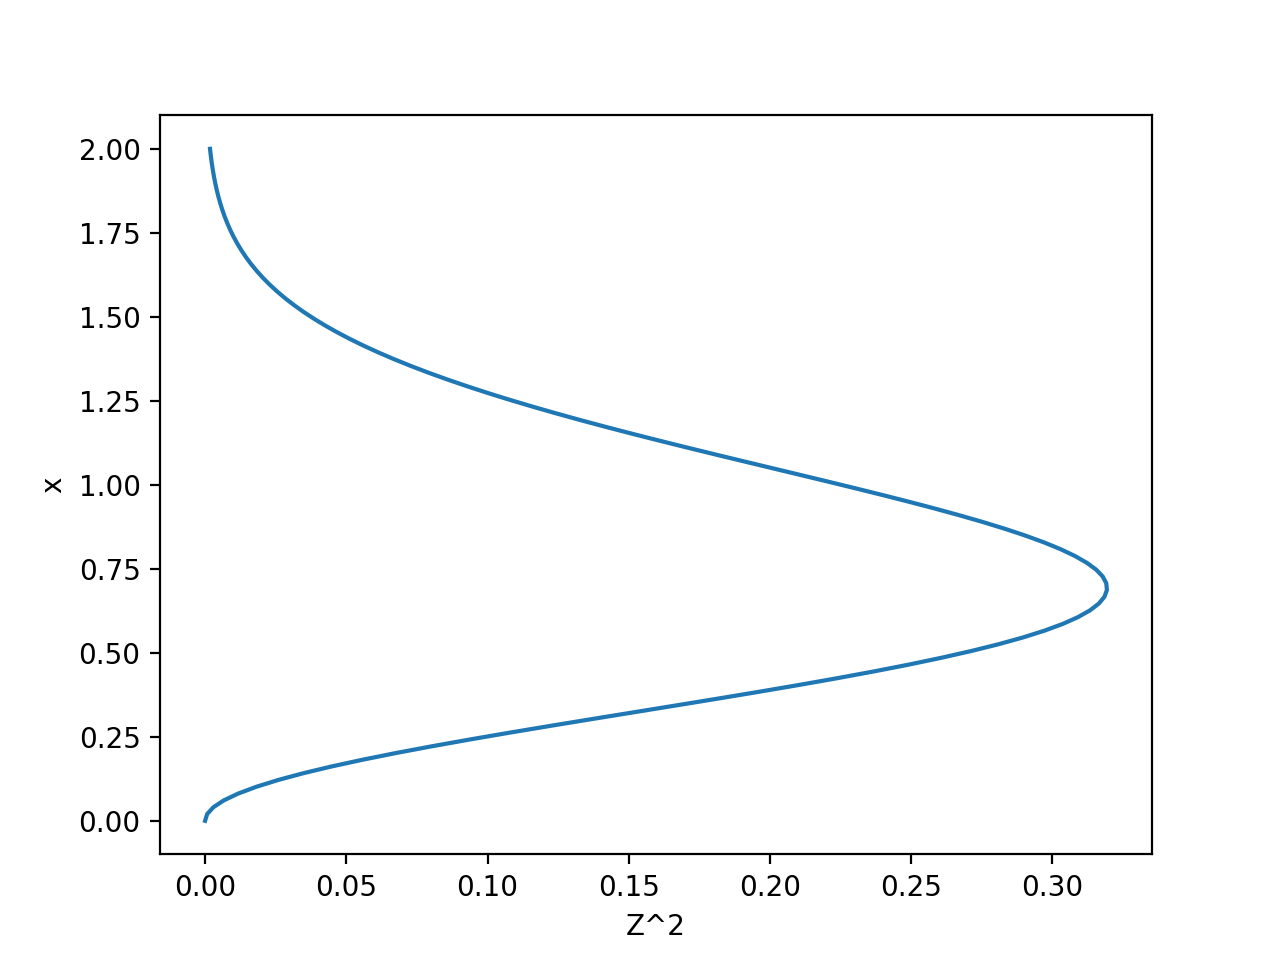

Text(0,0.5,'x')

In [14]:
plt.figure()
plt.plot(Z2totslice,x_array)
plt.xlabel('Z^2')
plt.ylabel('x')

In [9]:
dxdZ2 = diff(x_array)/diff(Z2totslice)
idxdZ2 = argwhere(dxdZ2>0)
jdxdZ2 = argwhere(dxdZ2<0)
#print(dxdZ2[idxdZ2])
#print(dxdZ2[jdxdZ2])

plt.figure()
plt.semilogy(Z2totslice[idxdZ2],dxdZ2[idxdZ2],'ko',label='x small leg')
plt.semilogy(Z2totslice[jdxdZ2],-dxdZ2[jdxdZ2],'ro',label='x big leg')
plt.grid(True)
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


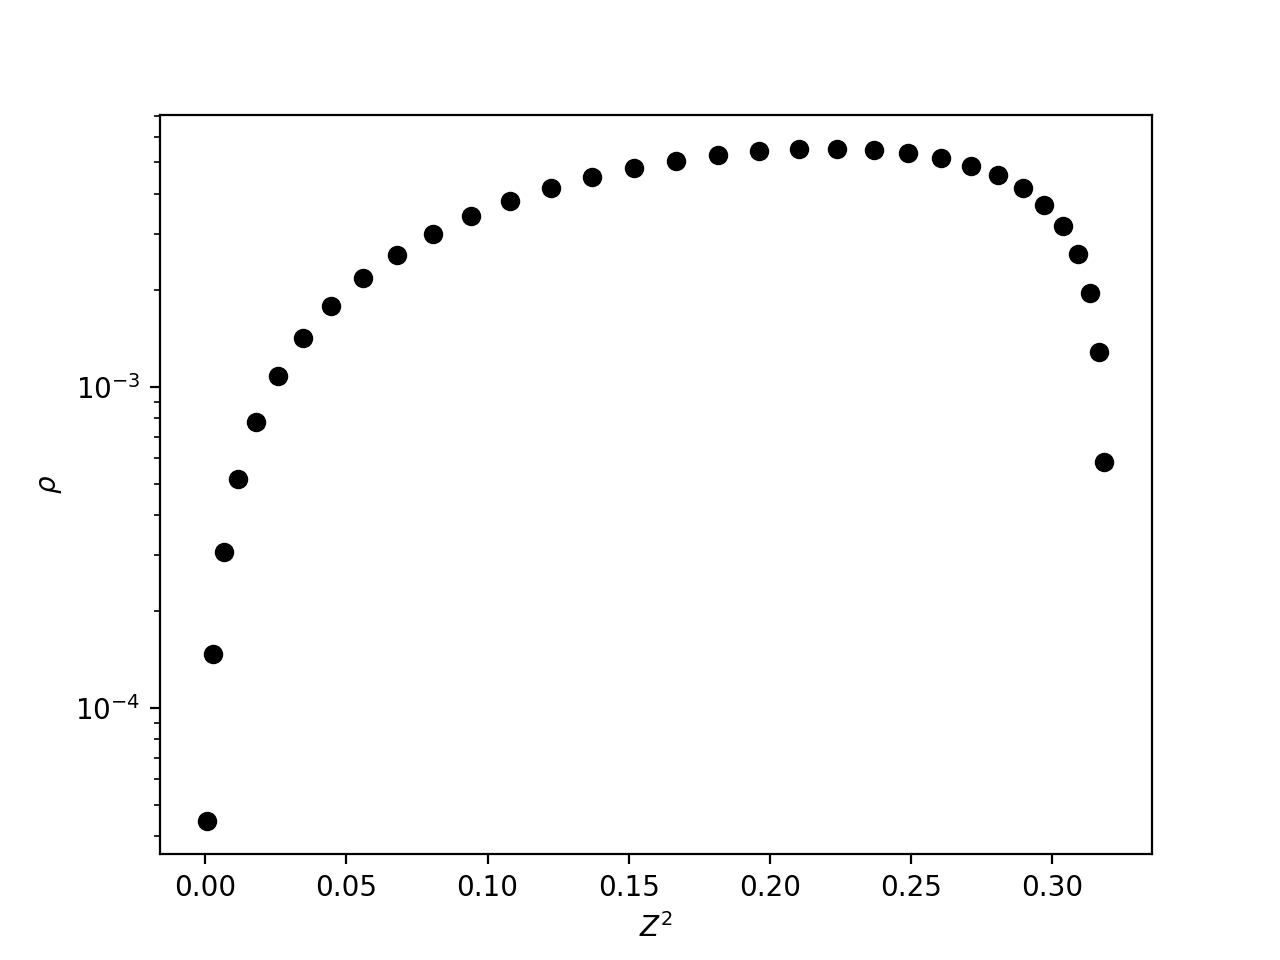

Text(0,0.5,'$\\rho$')

In [25]:
#func = x_array**2
#print(size(diff))
#df = diff(func)
#print(size(Z2totslice[:99]))
#probfunc = (x_array[:99])*((func[:99]) + df) - (x_array[:99])*(func[:99])
# diff = diff(probfunc)/diff(x_array[:99])
probfunc = (x_array[:99])*((Z2totslice[:99]) + diff(Z2totslice)) - (x_array[:99])*(Z2totslice[:99])

plt.figure()
plt.semilogy(Z2totslice[:99], probfunc,'ko')
plt.xlabel('$Z^2$')
plt.ylabel(r'$\rho$')

In [24]:
# deriv = diff(probfunc)/diff(Z2totslice[:99])
# plt.figure()
# plt.semilogy(Z2totslice[:98], deriv,'ko')